<a href="https://colab.research.google.com/github/dhjelmar/photo_sharpen/blob/main/myunblur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# following provides a link in /content to the temporary colab files that are created in the hidden /root/.fastai/data and /root/.torch/models directories
! curl -s https://course19.fast.ai/setup/colab | bash

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

'''
Then you can write to google drive like

with open('/content/gdrive/My Drive/file.txt', 'w') as f:
    f.write('content')

Or even save stuff like pandas files to csv there like

df.to_csv('/content/gdrive/My Drive/file.csv')

You can also read files from there like this

import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/file.csv')
'''
!ls /content/gdrive/My\ Drive/

Mounted at /content/gdrive


"\nThen you can write to google drive like\n\nwith open('/content/gdrive/My Drive/file.txt', 'w') as f:\n    f.write('content')\n\nOr even save stuff like pandas files to csv there like\n\ndf.to_csv('/content/gdrive/My Drive/file.csv')\n\nYou can also read files from there like this\n\nimport pandas as pd\ndf = pd.read_csv('/content/gdrive/My Drive/file.csv')\n"

In [ ]:
# clone respository (colab creates folder in current python folder which is /content)
! git clone https://github.com/VITA-Group/DeblurGANv2

In [ ]:
# install dependencies
! pip install -r ./DeblurGANv2/requirements.txt

Updating fastai...
Done.
Cloning into 'DeblurGANv2'...
remote: Enumerating objects: 902, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 902 (delta 151), reused 149 (delta 149), pack-reused 628
Receiving objects: 100% (902/902), 66.04 MiB | 23.21 MiB/s, done.
Resolving deltas: 100% (479/479), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 21.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.2 MB/s eta 0:00:00
  Prepa

In [22]:
# enter folder
! cd DeblurGANv2/

# Get trained model weights (colab puts in current folder)
! wget -O fpn_inception.h5 'https://docs.google.com/uc?export=download&id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&confirm=t' #https://drive.google.com/open?id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&authuser=0


--2024-06-03 20:53:34--  https://docs.google.com/uc?export=download&id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&confirm=t
Resolving docs.google.com (docs.google.com)... 142.251.8.139, 142.251.8.102, 142.251.8.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.8.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&export=download [following]
--2024-06-03 20:53:34--  https://drive.usercontent.google.com/download?id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.187.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428 (2.4K) [text/html]
Saving to: ‘fpn_inception.h5’

fpn_inception.h5    100%[===================>]   2.37K  --.-KB/s    in 0s      

In [30]:
# may need to uncomment the following
! wget -O inceptionresnetv2-520b38e4.pth http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth --no-check-certificate
! cp inceptionresnetv2-520b38e4.pth /root/.cache/torch/hub/checkpoints/

--2024-06-03 21:00:23--  http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth
Resolving data.lip6.fr (data.lip6.fr)... 132.227.201.10
Connecting to data.lip6.fr (data.lip6.fr)|132.227.201.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth [following]
--2024-06-03 21:00:24--  https://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth
Connecting to data.lip6.fr (data.lip6.fr)|132.227.201.10|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 223774246 (213M) [application/octet-stream]
Saving to: ‘inceptionresnetv2-520b38e4.pth’

inceptionresnetv2-5 100%[===================>] 213.41M   362KB/s    in 10m 29s 

2024-06-03 21:10:53 (348 KB/s) - ‘inceptionresnetv2-520b38e4.pth’ saved [223774246/223774246]

cp: cannot create regular file '/root/.cache/torch/hub/checkpoints/': No such 

In [23]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import re

In [26]:
os.getcwd()

'/content/DeblurGANv2'

/bin/bash: line 1: cd: DeblurGANv2/: No such file or directory


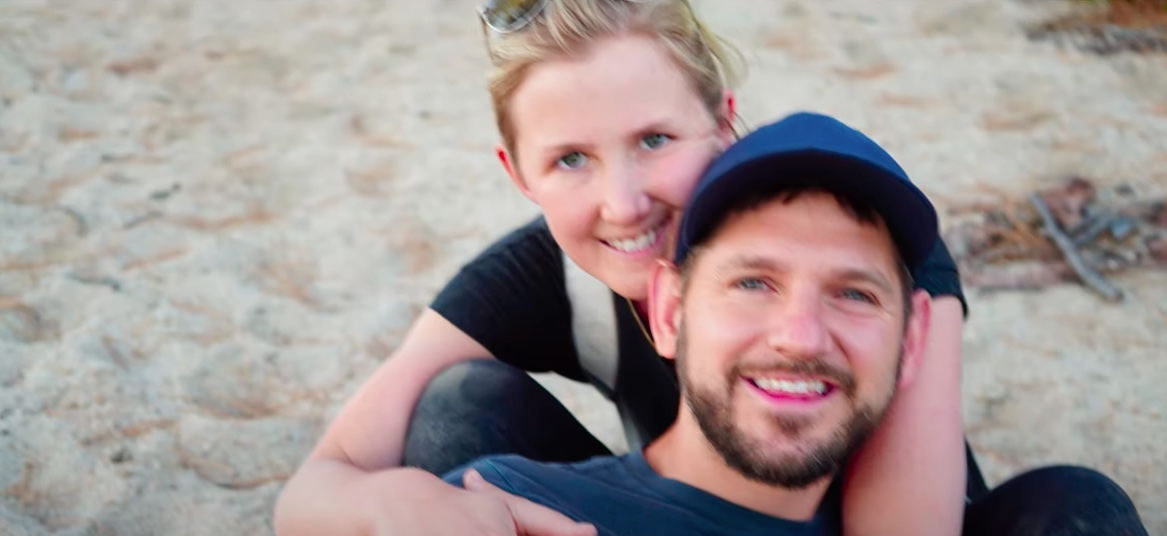

In [27]:
Image.open('blurred-image.jpeg')

In [28]:
! python predict.py 'blurred-image.jpg'

In [29]:
! ls submit

000001.png  000019.png	000201.png
